In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import cv2 as cv
from scipy.ndimage.interpolation import shift


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

digits_mnist = tf.keras.datasets.mnist


(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [4]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)


10000

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

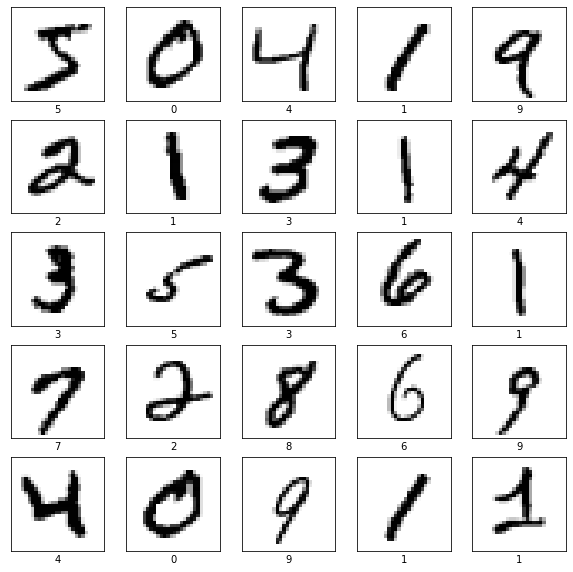

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

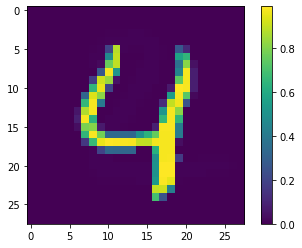

(100, 28, 28)

In [7]:
"""first_image = train_images[1]
plt.figure()
plt.imshow(first_image)
plt.colorbar()
plt.grid(False)
plt.show()

second_image = train_images[2]
plt.figure()
plt.imshow(second_image)
plt.colorbar()
plt.grid(False)
plt.show()

morphed_image = cv.add(first_image,second_image)
plt.figure()
plt.imshow(morphed_image)
plt.colorbar()
plt.grid(False)
plt.show()
"""
"""def morphed_mages_generator (first, second):
  num_rows, num_cols = first.shape[:2]
  training_data = []
  labels = []
  for i in range(100):
    alpha = i/100
    translation_matrix = np.float32([ [1,0,alpha], [0,1,0] ])
    translation_matrix2 = np.float32([ [1,0,(1-alpha)], [0,1,0] ])
    shifted_image1 = cv2.warpAffine(first, translation_matrix, (num_cols,num_rows))
    shifted_image2 = cv2.warpAffine(second, translation_matrix2, (num_cols,num_rows))
    morphed_image = cv.add(shifted_image1,shifted_image2)
    training_data.append(morphed_image)    
  return training_data"""

def morphed_images_generator (first, second):
  training_data = []
  x = []
  for i in range(100):
    alpha = i/100
    first_img = first * alpha
    second_img = second * (1-alpha)
    morphed_image = cv.add(first_img,second_img)
    training_data.append(morphed_image)
  x = np.array(training_data)
  return x

first_image = test_images[4]
second_image = test_images[1]
morphed_data_set = morphed_images_generator (first_image, second_image)

morphed_data_set.shape

first_image_morphed = morphed_data_set[99]
plt.figure()
plt.imshow(first_image_morphed)
plt.colorbar()
plt.grid(False)
plt.show()

morphed_data_set.shape

#first_image_morphed = first_image_morphed.reshape(28,28,1)


In [8]:
"""def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

    
a = np.array([[1, 0],
              [0, 1]])
dst = linear_transformation(second_image, a)
plt.imshow(dst)
plt.show()

second_image = train_images[2]
plt.figure()
plt.imshow(second_image)
plt.colorbar()
plt.grid(False)
plt.show()

result = shift(second_image, 2, cval=0)
plt.figure()
plt.imshow(result)
plt.colorbar()
plt.grid(False)
plt.show()"""

"def linear_transformation(src, a):\n    M, N = src.shape\n    points = np.mgrid[0:N, 0:M].reshape((2, M*N))\n    new_points = np.linalg.inv(a).dot(points).round().astype(int)\n    x, y = new_points.reshape((2, M, N), order='F')\n    indices = x + N*y\n    return np.take(src, indices, mode='wrap')\n\n    \na = np.array([[1, 0],\n              [0, 1]])\ndst = linear_transformation(second_image, a)\nplt.imshow(dst)\nplt.show()\n\nsecond_image = train_images[2]\nplt.figure()\nplt.imshow(second_image)\nplt.colorbar()\nplt.grid(False)\nplt.show()\n\nresult = shift(second_image, 2, cval=0)\nplt.figure()\nplt.imshow(result)\nplt.colorbar()\nplt.grid(False)\nplt.show()"

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2560 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1122 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0782 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0776 - accuracy: 0.9792 - 507ms/epoch - 2ms/step

Test accuracy: 0.979200005531311


In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(morphed_data_set)
morphed_data_set.shape

(100, 28, 28)

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'blue'

  plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('blue')
  thisplot[true_label].set_color('blue')

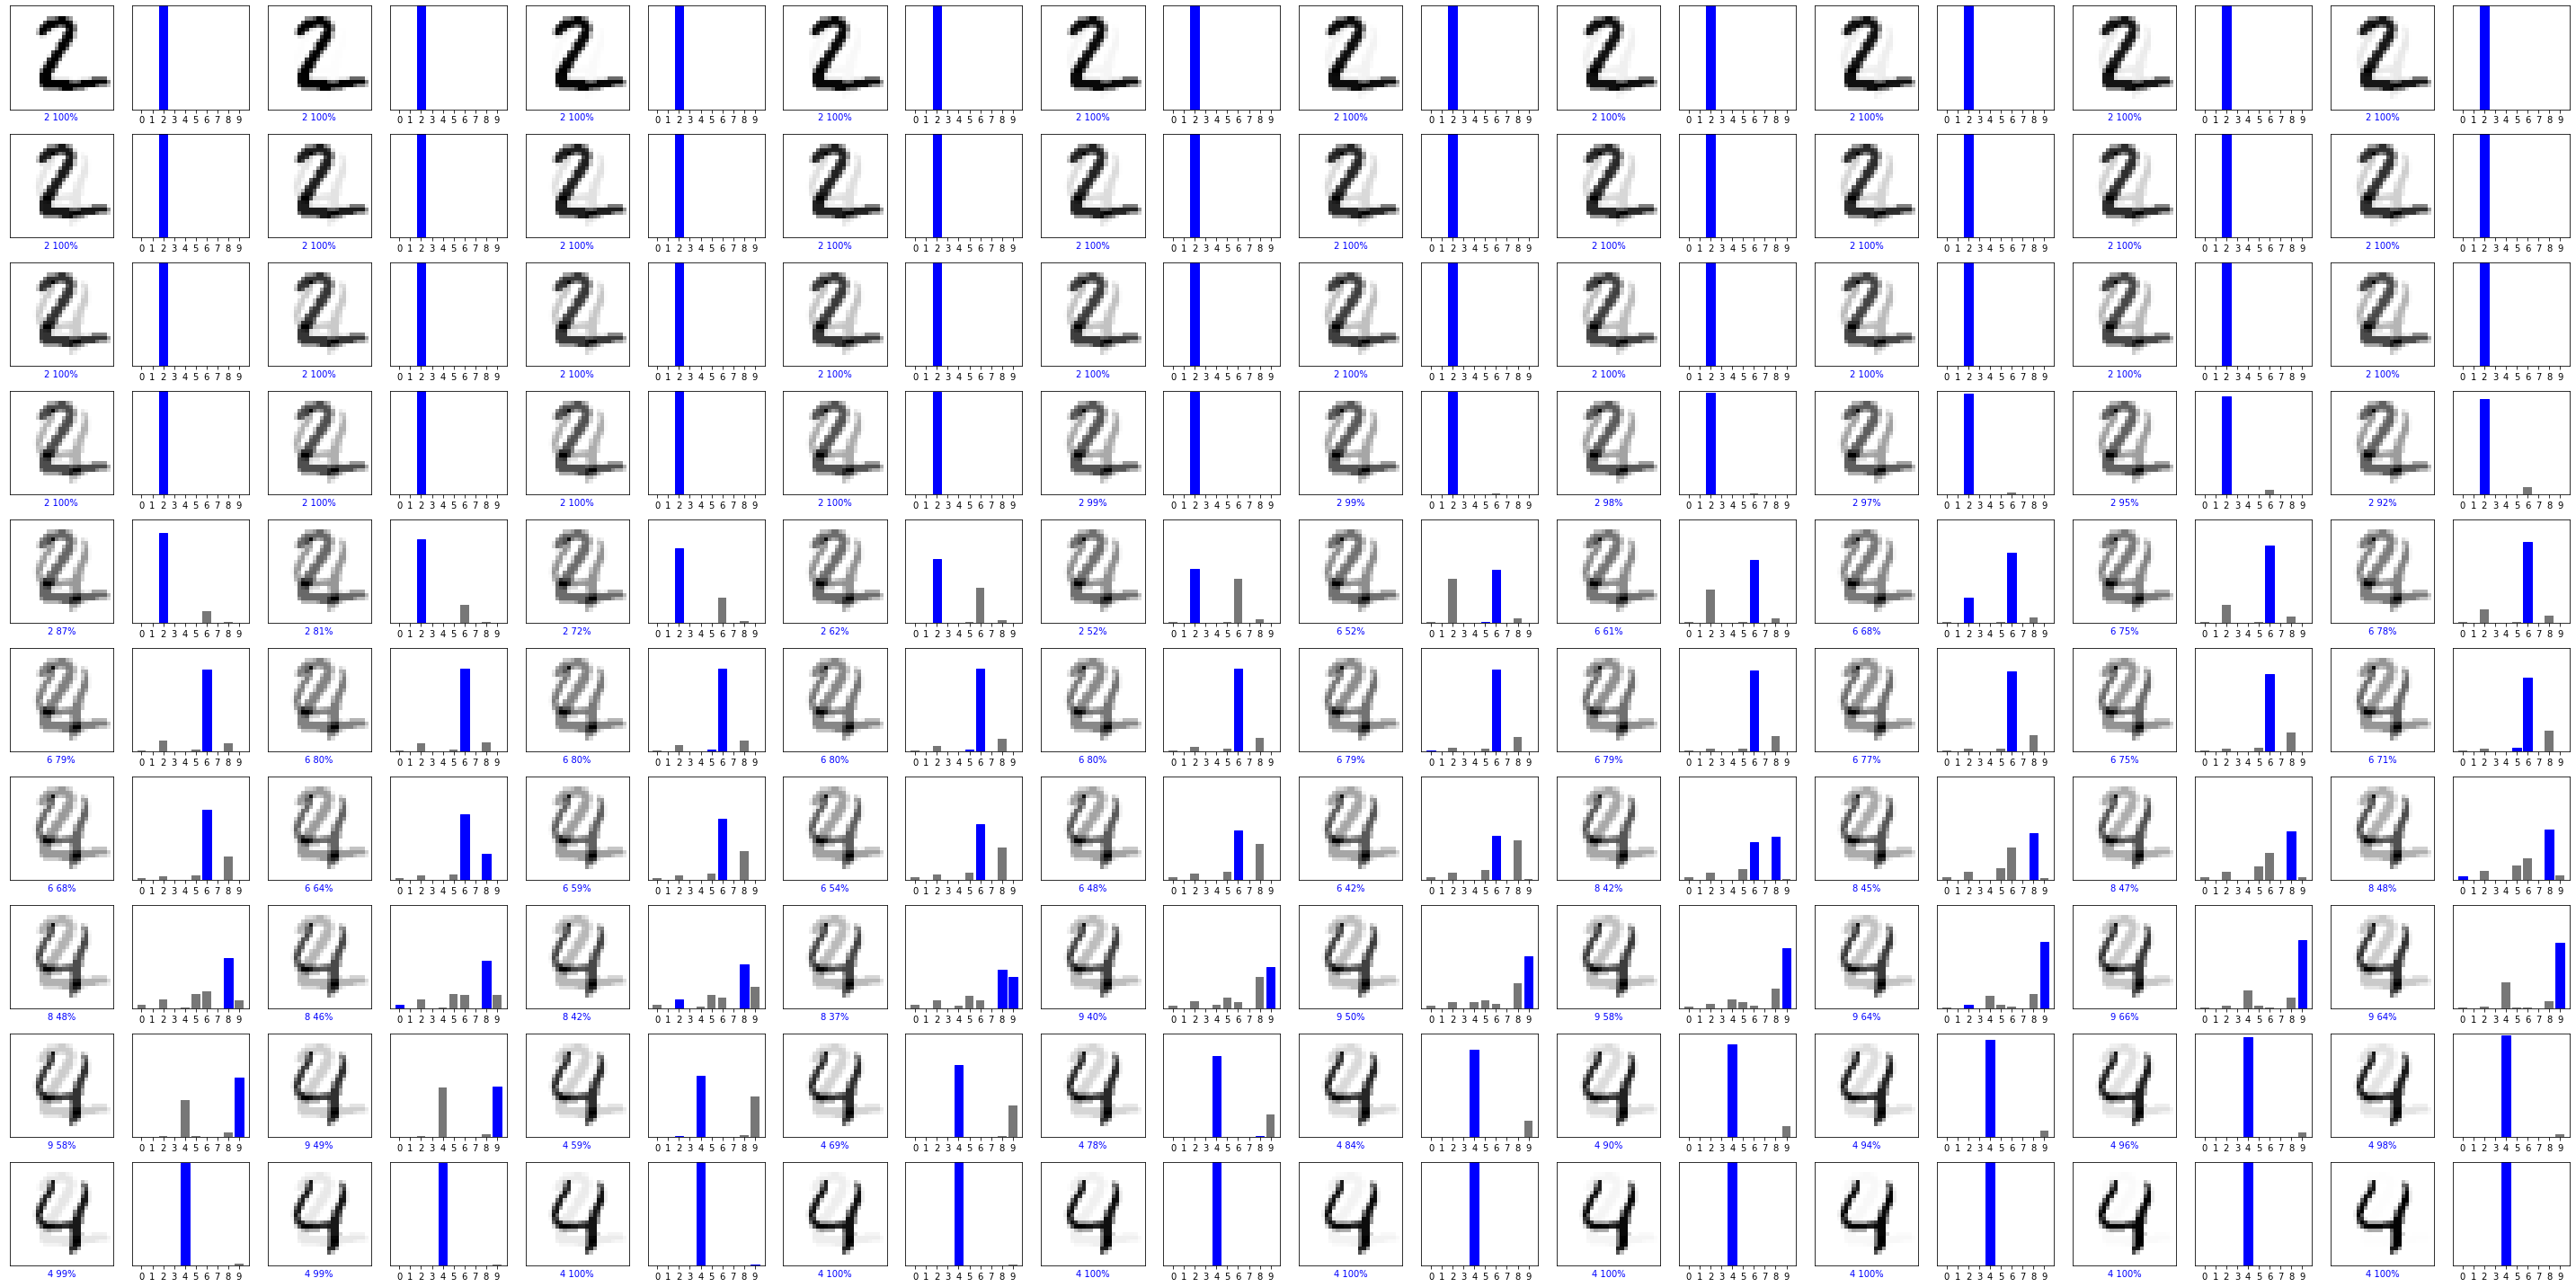

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  alfa = i/100
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, morphed_data_set)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()